In [69]:
library(tidyverse)
library(readxl)
library(reshape2) 
install.packages("scales")                                   
library("scales")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [70]:
#loading data
url <- "https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients?fbclid=IwAR3zj19Vq3zUk-QZaKzZDGcghVgblSfERm7w8v76w8BzqHQd3PBthNleueI"
credit_card_data <- read_excel("default_credit_cards.xlsx")

head(credit_card_data)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [71]:
#cleaning data
credit_card_clean <- credit_card_data %>%
                     mutate(education_level=as.character(`EDUCATION`)) %>%
                     mutate(default=as.character(`default payment next month`)) %>%
                     select(education_level, default) %>% 
                     mutate(education_level = replace(education_level, education_level == "2", "university grad"),
                            default = replace(default, default== "1", "yes")) %>%
                     mutate(education_level = replace(education_level, education_level == "3", "high school grad"),
                            default = replace(default, default== "0", "no"))%>%
                    filter(education_level == 'university grad' | education_level == 'high school grad')
head(credit_card_clean)

education_level,default
<chr>,<chr>
university grad,yes
university grad,yes
university grad,no
university grad,no
university grad,no
university grad,no


`summarise()` has grouped output by 'education_level'. You can override using
the `.groups` argument.


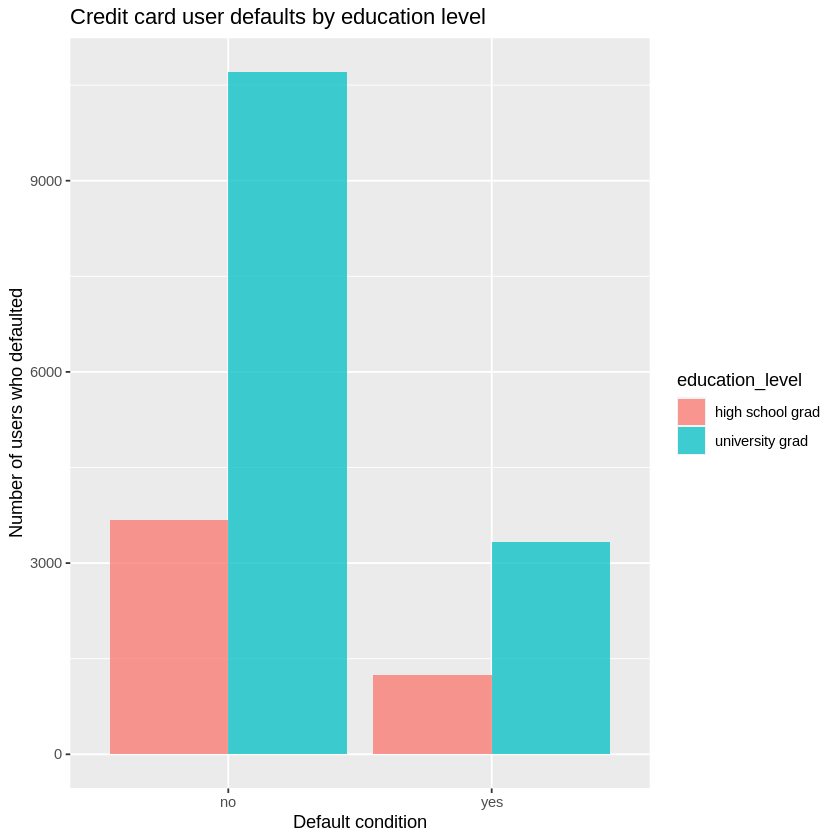

In [72]:
credit_card_count <- credit_card_clean %>%
                        group_by(education_level, default)%>%
                        summarise(count=n()) 

credit_card_plot <- credit_card_count %>%
                    ggplot(aes(x=default, y=count, fill=education_level))+
                    geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)+
                    ggtitle("Credit card user defaults by education level") +
                    labs(x="Default condition", y="Number of users who defaulted")

credit_card_plot

In [78]:
credit_card_matrix <- credit_card_count %>%
                        dcast(education_level~default, value.var="count") %>%
                        mutate(default = percent(yes/(yes+no)), no_default = percent(no/(yes+no))) %>%
                        select(education_level, default, no_default)
credit_card_matrix

education_level,default,no_default
<chr>,<chr>,<chr>
high school grad,25.2%,74.8%
university grad,23.7%,76.3%
